<a href="https://colab.research.google.com/github/CrissRMFI/TA047R-2C2024-GRUPO08/blob/main/TA047R_TP1_GRUPOXX_ENTREGA_EJ04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

In [ ]:
spotify = pd.read_csv("playlist_spotify.csv")

### Vemos la estructructura el archivo

In [ ]:
spotify.head(5)

acousticness  danceability  duration  energy  instrumentalness  key  \
0         0.713         0.514    100125   0.521          0.816000    8   
1         0.192         0.714    207019   0.614          0.000000    4   
2         0.333         0.630    216200   0.455          0.000004    5   
3         0.601         0.810    136413   0.221          0.210000    5   
4         0.883         0.465    181440   0.459          0.000173    6   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  
0    0.1120   -14.835     0       0.0444  119.879               4    0.143  
1    0.2630    -6.935     1       0.0319  123.969               4    0.582  
2    0.1270    -9.290     1       0.0292  139.931               4    0.199  
3    0.1840   -11.005     1       0.0429  109.960               4    0.798  
4    0.0692    -8.137     0       0.0351   90.807               4    0.288

In [ ]:
print(spotify.shape)

(750, 13)


# Limpieza

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 76.3 KB


In [ ]:
spotify.isna().value_counts().sum()

750

No hya datos faltantes

Realizaremos un análisis de la tendencia al clustering usando K-Means.

Empezaremos observando la tendencia al clustering es decir como se agrupan naturalmente en subconjuntos, revelando patrones no son evidentes a simple vista.

# Visualizaciones

## Acústica

In [ ]:
spotify["acousticness"].describe()

count    750.000000
mean       0.357394
std        0.338405
min        0.000001
25%        0.037150
50%        0.244500
75%        0.678500
max        0.994000
Name: acousticness, dtype: float64

In [ ]:
sns.set(style="whitegrid")

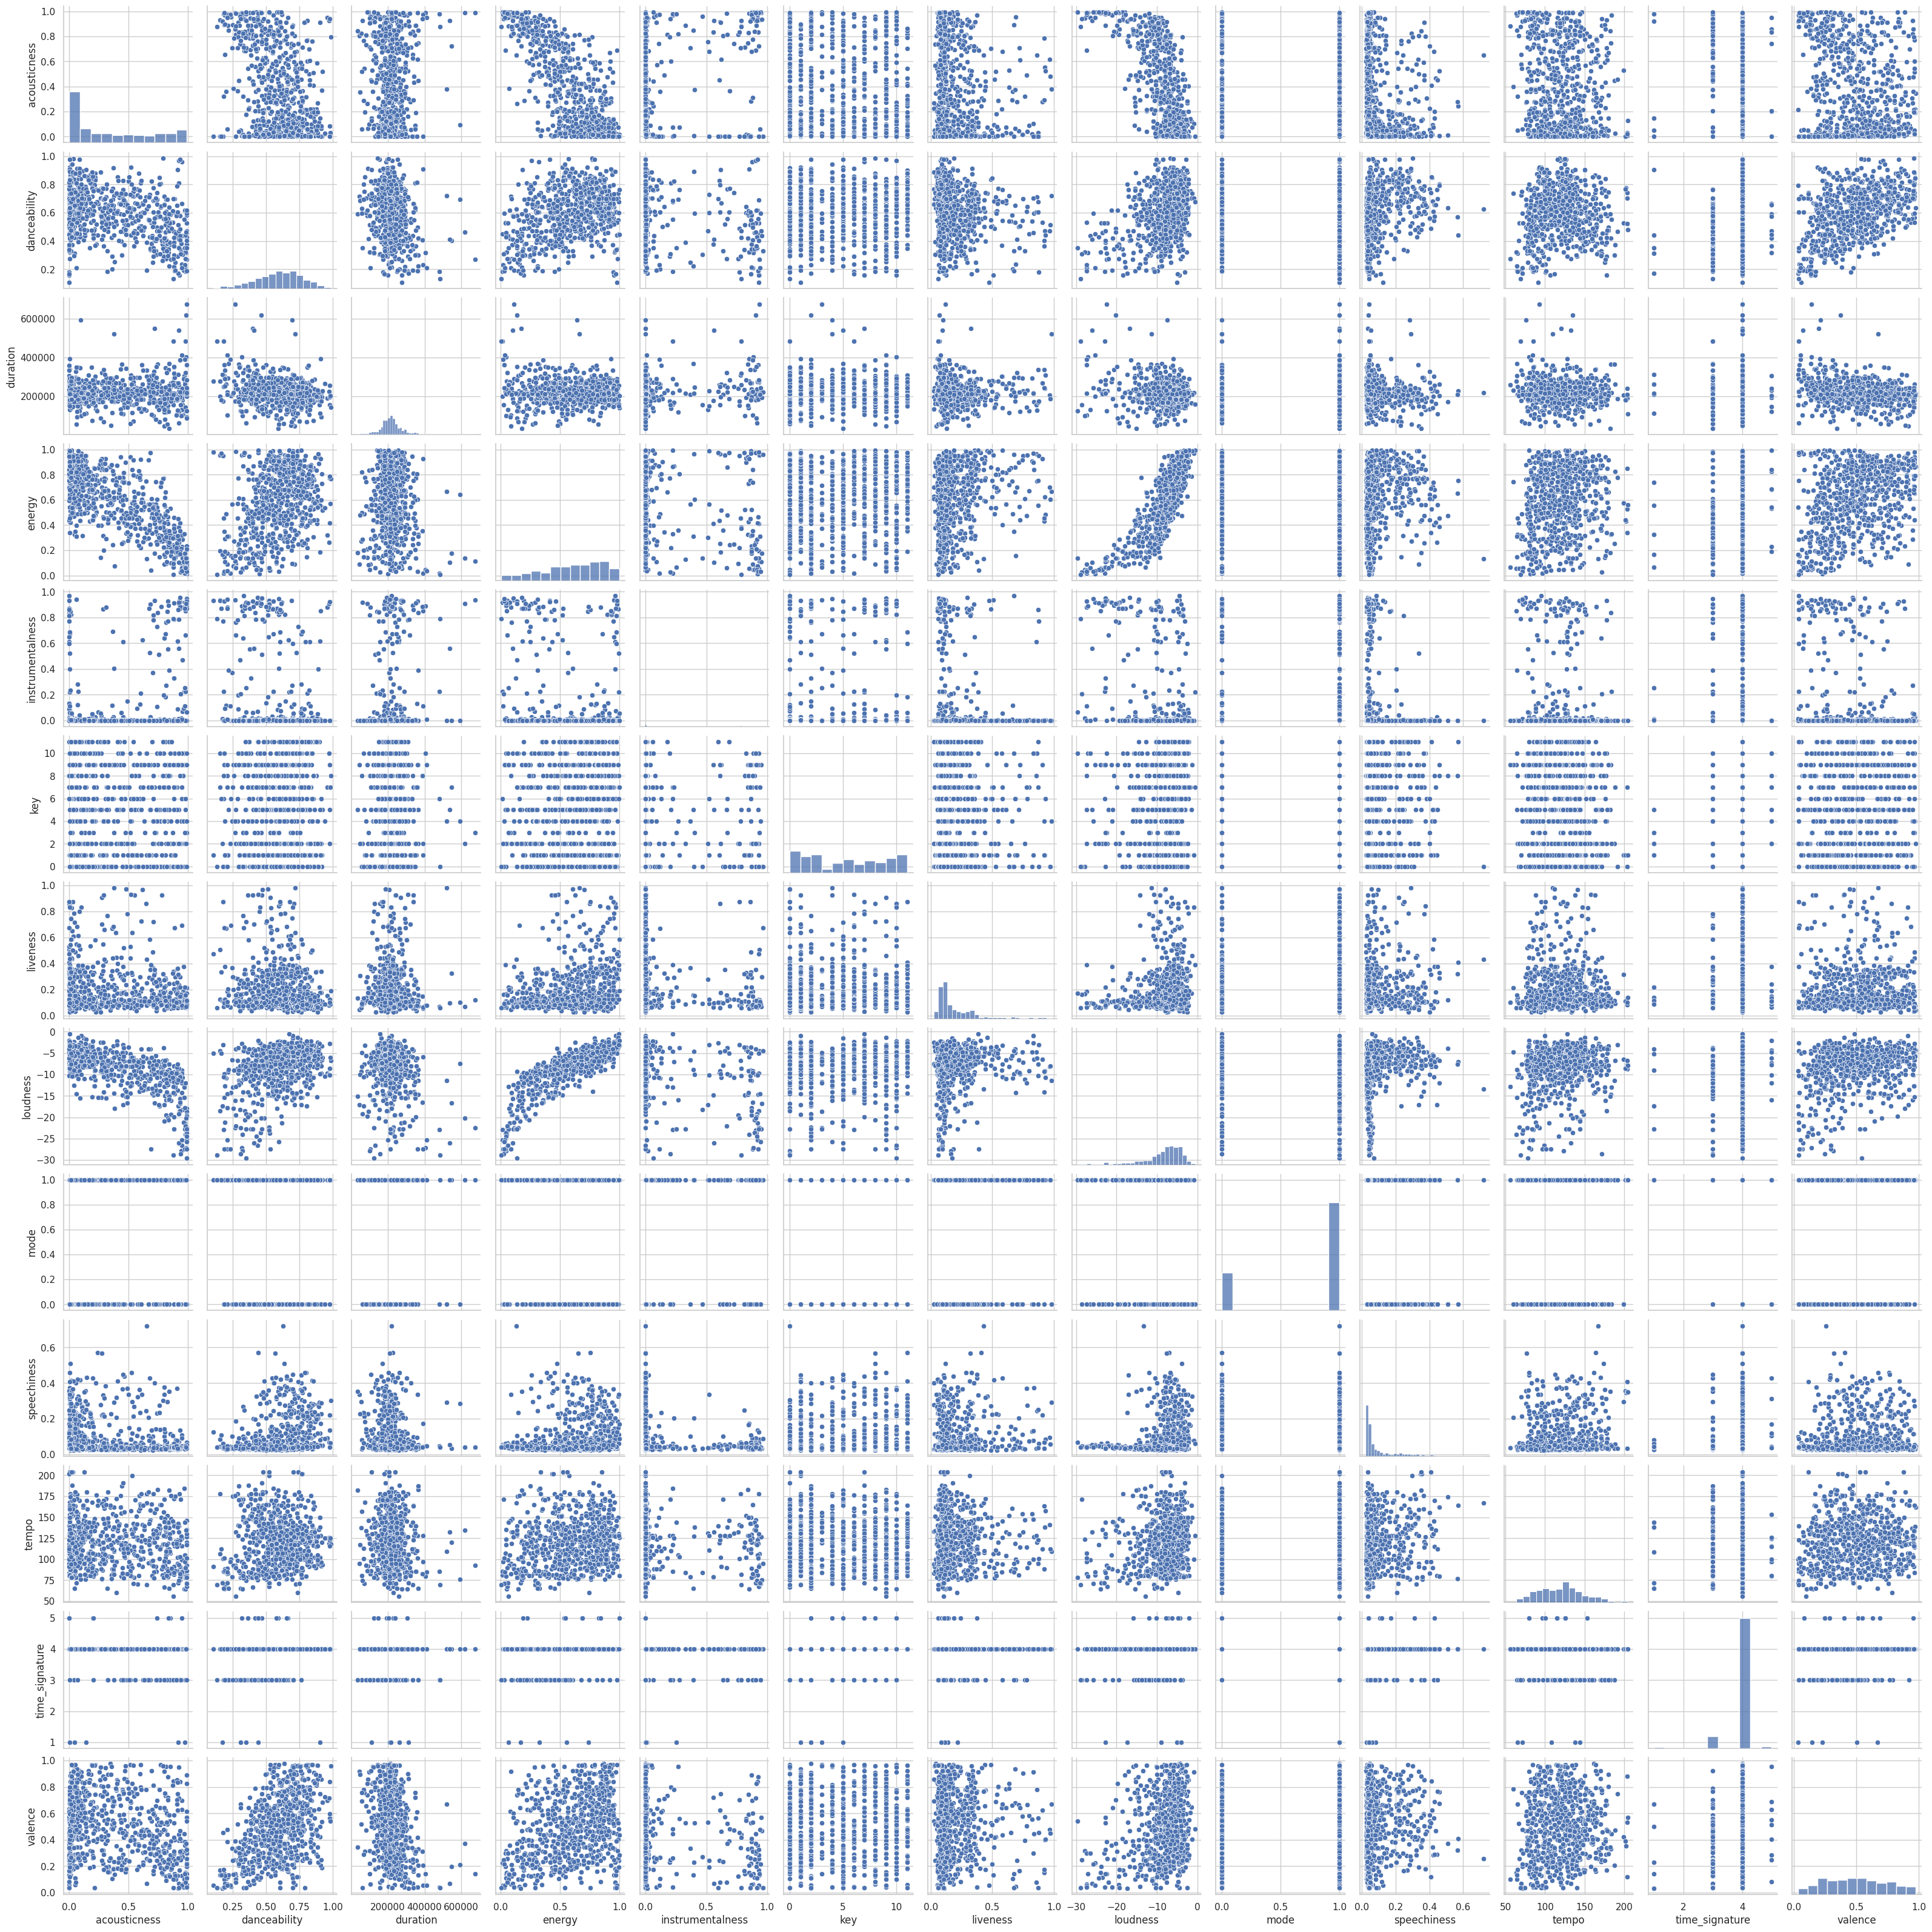

In [ ]:
sns.pairplot(spotify)

In [ ]:
spotify.corr()

acousticness  danceability  duration    energy  \
acousticness          1.000000     -0.417974  0.054988 -0.781691   
danceability         -0.417974      1.000000 -0.231120  0.360971   
duration              0.054988     -0.231120  1.000000 -0.093435   
energy               -0.781691      0.360971 -0.093435  1.000000   
instrumentalness      0.331659     -0.238865  0.161803 -0.267846   
key                  -0.065184      0.055302 -0.002089  0.066970   
liveness             -0.140326     -0.115735 -0.002576  0.235887   
loudness             -0.695163      0.396021 -0.179952  0.830081   
mode                  0.111980     -0.058461 -0.011989 -0.102567   
speechiness          -0.215614      0.272283 -0.110645  0.173371   
tempo                -0.149472      0.064002 -0.052321  0.197741   
time_signature       -0.205854      0.222486 -0.003030  0.241667   
valence              -0.233485      0.483361 -0.256984  0.364495   

                  instrumentalness       key  liveness  loudness      mode  \
acousticness              0.331659 -0.065184 -0.140326 -0.695163  0.111980   
danceability             -0.238865  0.055302 -0.115735  0.396021 -0.058461   
duration                  0.161803 -0.002089 -0.002576 -0.179952 -0.011989   
energy                   -0.267846  0.066970  0.235887  0.830081 -0.102567   
instrumentalness          1.000000 -0.020726 -0.050720 -0.429529 -0.032180   
key                      -0.020726  1.000000 -0.055710  0.009126 -0.158468   
liveness                 -0.050720 -0.055710  1.000000  0.154176 -0.023585   
loudness                 -0.429529  0.009126  0.154176  1.000000 -0.048111   
mode                     -0.032180 -0.158468 -0.023585 -0.048111  1.000000   
speechiness              -0.145104  0.081137  0.106747  0.188873 -0.118390   
tempo                    -0.081531 -0.084476 -0.008093  0.188127  0.013911   
time_signature           -0.024597  0.096863  0.037201  0.169130 -0.044799   
valence                  -0.228774  0.068146  0.051110  0.294852  0.051939   

                  speechiness     tempo  time_signature   valence  
acousticness        -0.215614 -0.149472       -0.205854 -0.233485  
danceability         0.272283  0.064002        0.222486  0.483361  
duration            -0.110645 -0.052321       -0.003030 -0.256984  
energy               0.173371  0.197741        0.241667  0.364495  
instrumentalness    -0.145104 -0.081531       -0.024597 -0.228774  
key                  0.081137 -0.084476        0.096863  0.068146  
liveness             0.106747 -0.008093        0.037201  0.051110  
loudness             0.188873  0.188127        0.169130  0.294852  
mode                -0.118390  0.013911       -0.044799  0.051939  
speechiness          1.000000  0.139993        0.088062  0.101257  
tempo                0.139993  1.000000        0.027999  0.076123  
time_signature       0.088062  0.027999        1.000000  0.143921  
valence              0.101257  0.076123        0.143921  1.000000

In [ ]:
spotify[['danceability', 'energy', 'acousticness', 'valence','duration','instrumentalness','loudness','tempo','speechiness']].describe()

danceability      energy  acousticness     valence    duration  \
count    750.000000  750.000000    750.000000  750.000000  750.000000   
mean       0.596439    0.594188      0.357394    0.497321    0.290362   
std        0.172036    0.253301      0.338405    0.239615    0.102238   
min        0.107000    0.009250      0.000001    0.033200    0.000000   
25%        0.480000    0.423250      0.037150    0.297000    0.236392   
50%        0.606000    0.631500      0.244500    0.483000    0.282561   
75%        0.715750    0.804750      0.678500    0.684500    0.327966   
max        0.986000    0.995000      0.994000    0.975000    1.000000   

       instrumentalness    loudness       tempo  speechiness  
count        750.000000  750.000000  750.000000   750.000000  
mean           0.100245   -8.509339  120.405761     0.098966  
std            0.259921    5.039488   28.378116     0.104715  
min            0.000000  -29.601000   55.747000     0.023400  
25%            0.000000  -10.173500   98.998000     0.035900  
50%            0.000010   -7.270000  120.104500     0.048750  
75%            0.002245   -5.097750  138.074750     0.113000  
max            0.967000   -0.533000  204.162000     0.721000

<Axes: >

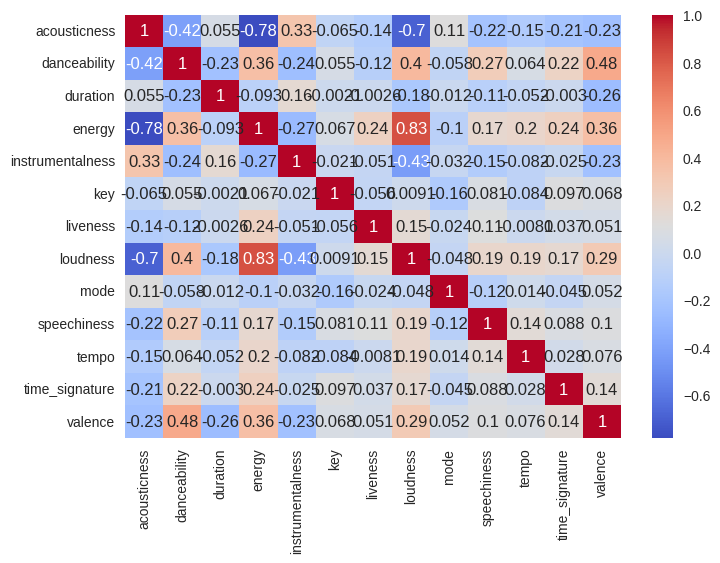

In [ ]:
sns.heatmap(spotify.corr(),annot=True,cmap='coolwarm')

<Figure size 1200x800 with 0 Axes>

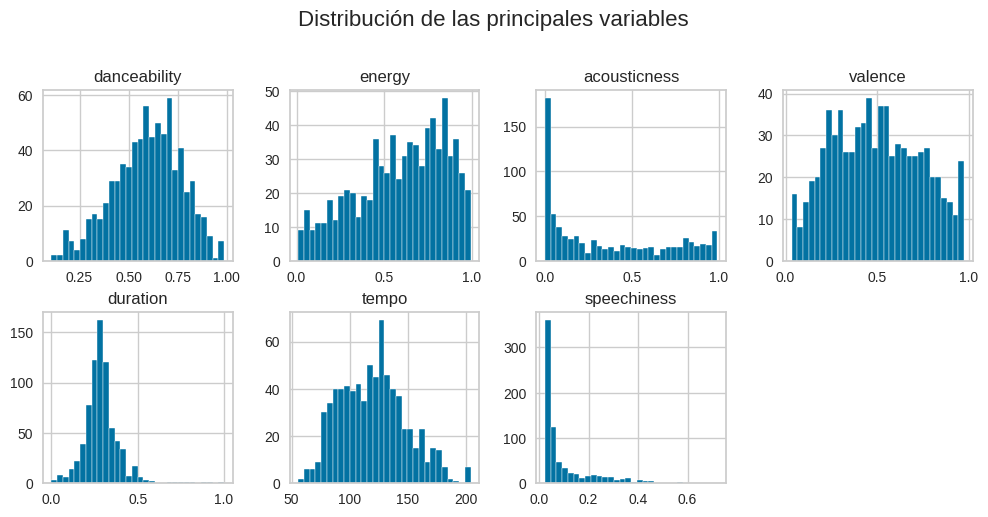

In [ ]:
plt.figure(figsize=(12, 8))
spotify[['danceability', 'energy', 'acousticness', 'valence','duration','tempo','speechiness']].hist(bins=30, figsize=(12, 8), layout=(3, 4))
plt.suptitle("Distribución de las principales variables", fontsize=16)
plt.show()

#Energy

EL histograma nos muestra una distribución levente sesgada, lo cual se representa también con la media de 0.59 y la mediana es 0.63, lo que significa que hay algunas canciones con valores de energía más bajos que tiran la media hacia abajo.
Algunas canciones tienen mucha "energy", mientras que otras son considerablemente menos energéticas.

Posible Presencia de Outliers:
El valor mínimo de 0.009 está muy alejado del percentil 25%, lo que sugiere que podrían existir algunas canciones con valores de energía extremadamente bajos, actuando como outliers.
La mayor parte de las canciones tiene una energía moderada o alta.

#Acoustucness

EL histograma revela una distribución muy asimétrica hacia la izquierda, con un media de 0.36 y mediana es 0.24, hay varios valores altos que están inflando la media.
En cuanto a la desviación estándar las canciones varían considerablemente en cuanto a qué tan acústicas son.
El valor mínimo es casi 0 ("0.000001"), con el significado de que hay canciones sin ninguna característica acústica, pero también encontramos como valor máximo de casi 1.
La canciones son mayormente no acústicas, porque el 25% de las canciones tiene un valor de acousticness menor a 0.037. Para el 50% de las canciones (mediana) tiene un valor menor o igual a 0.244, lo que confirma que la mayoría de las canciones tienen una acousticness baja o moderada.

#Valance

Esta columna mide la positividad emocional de las pistas musicales, vemos una distribución moderadamente equilibrada.
La media es 0.497, y la mediana es 0.483, lo que significa que los valores de valence están bastante distribuidos de manera equitativa en torno a la mitad del rango (0.0 a 1.0).
La ligera diferencia entre la media y la mediana sugiere que la distribución podría ser casi simétrica.
Canciones de baja positividad aquellas con valores menores al percentil 25% (0.297).
El conjunto de datos tiene una distribución bastante equilibrada de canciones en términos de valencia emocional. La mayoría de las canciones están en un rango de positividad moderada, con una buena cantidad de pistas que son tanto emocionalmente negativas (tristes) como extremadamente positivas (felices). Sin embargo, no parece haber un sesgo marcado hacia ninguno de los extremos, y la variabilidad es moderada.

#Duration

La media de la duración es de aproximadamente 220K ms, lo que indica que, en promedio, las pistas son bastante largas, diferencia entre la media y la mediana sugiere que podría haber algunas pistas muy largas que están inflando la media.
Notamos alta aariabilidad ya que la desviación estándar de 65K ms indica que algunas pistas son significativamente más cortas o más largas que la duración promedio.
El valor mínimo es 33,840 ms lo que indica que hay canciones muy cortas en el conjunto de datos, y con un valor máximo de 675K ms, que es una duración bastante larga para una pista musical.
La duración de las pistas en este conjunto de datos varía bastante, desde muy cortas hasta bastante largas. La media indica que la duración promedio es considerable, y aunque la mayoría de las pistas están en un rango de duración moderada, hay algunas pistas extremadamente largas que podrían estar influyendo en la media.

# Danceability:

La mediana la encontramos alrededor de 0.6, y la media destadistica es 0.596, lo cual hace que la distribución sea aproximadamente simétrica.
La desviación estándar de 0.17 indica una dispersión moderada de los datos, lo que significa que la mayoría de las canciones no se desvían demasiado de la media.

Con los datos del percentil, con 0.48 para el 25% y 0.72 para el 75% notamos (también ayuda el histograma) que las canciones tienen un danceability moderada o alta.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

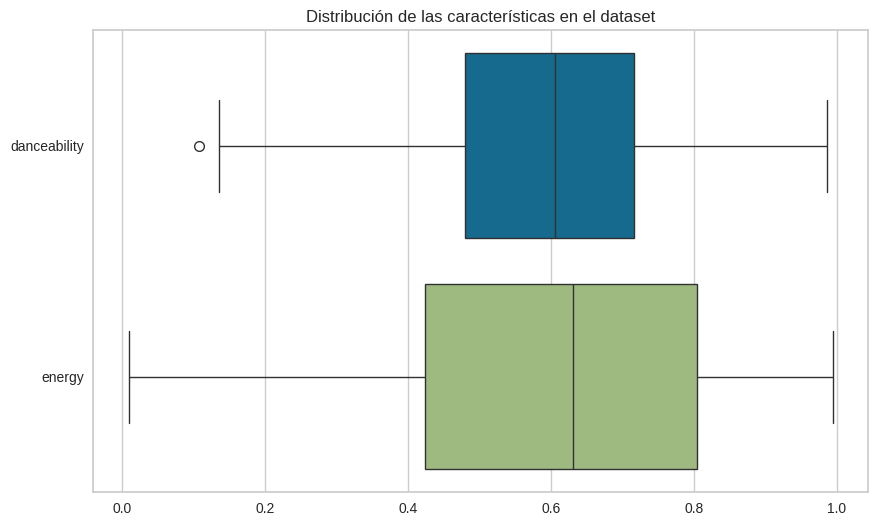

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=spotify[['danceability', 'energy']], orient="h")
plt.title('Distribución de las características en el dataset')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

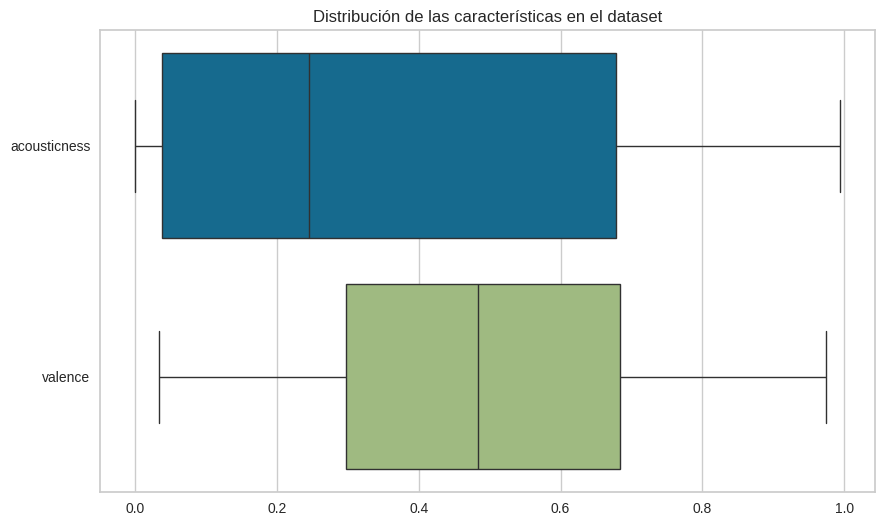

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=spotify[['acousticness', 'valence']], orient="h")
plt.title('Distribución de las características en el dataset')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


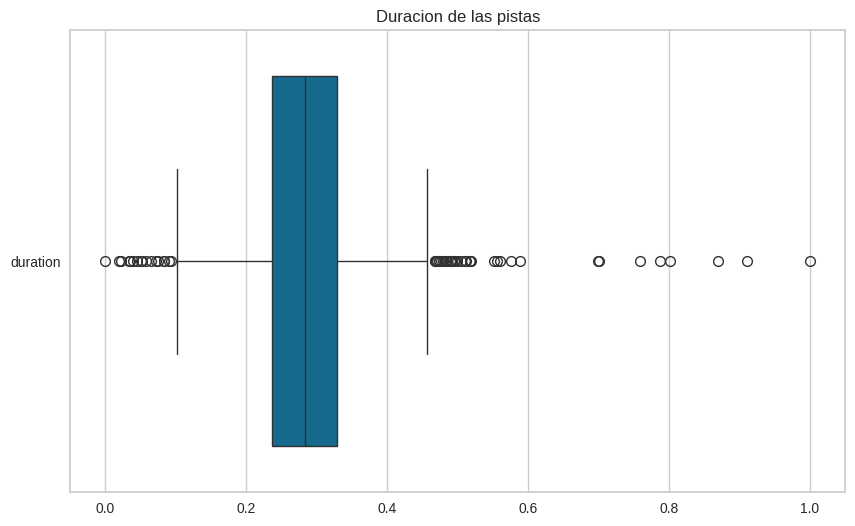

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=spotify[['duration']], orient="h")
plt.title('Duracion de las pistas')
plt.show()

## Trabajando con outliers de duration


In [ ]:
Q1 = spotify['duration'].quantile(0.25)
Q3 = spotify['duration'].quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR
spotify_filtered = spotify[(spotify['duration'] >= min) & (spotify['duration'] <= max)]

print("Cantidad de filas en el data set: ", spotify.shape[0])
print("Cantidad de filas outliers: ", spotify.shape[0]-spotify_filtered.shape[0])
print("Porcentaje de outliers: ", (100-(spotify_filtered.shape[0]/spotify.shape[0]) *100), "%")

Cantidad de filas en el data set:  750
Cantidad de filas outliers:  53
Porcentaje de outliers:  7.066666666666663 %


In [ ]:
spotify_outliers_duration = spotify[(spotify['duration'] < min) | (spotify['duration'] > max)]
spotify_outliers_duration.duration.describe()

count    53.000000
mean      0.406690
std       0.271867
min       0.000000
25%       0.082574
50%       0.484828
75%       0.518975
max       1.000000
Name: duration, dtype: float64

In [ ]:
spotify_filtered.duration.describe()

count    697.000000
mean       0.281516
std        0.067953
min        0.100940
25%        0.237229
50%        0.280937
75%        0.321486
max        0.455959
Name: duration, dtype: float64

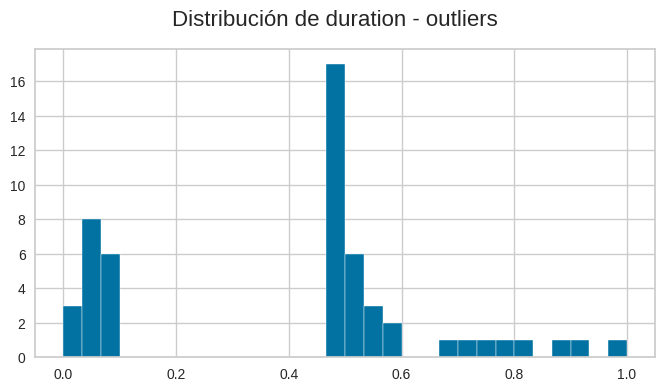

In [ ]:
plt.figure(figsize=(8, 8))
spotify_outliers_duration['duration'].hist(bins=30, figsize=(8, 4))
plt.suptitle("Distribución de duration - outliers", fontsize=16)
plt.show()

Con una media de 294K ms, una mediana de 344K ms y una desviación estándar de 174K ms, observamos que las duraciones de las pistas están muy dispersas.

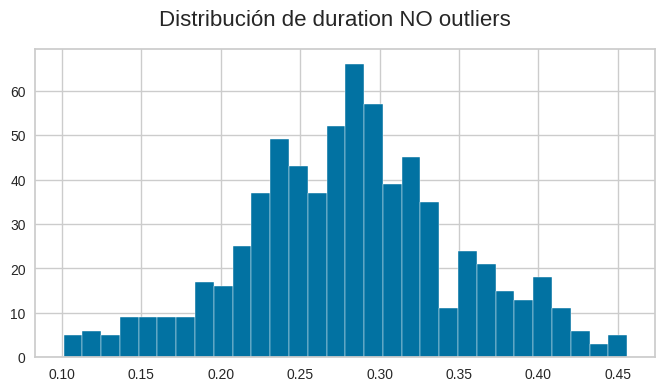

In [ ]:
plt.figure(figsize=(8, 8))
spotify_filtered['duration'].hist(bins=30, figsize=(8, 4))
plt.suptitle("Distribución de duration NO outliers", fontsize=16)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


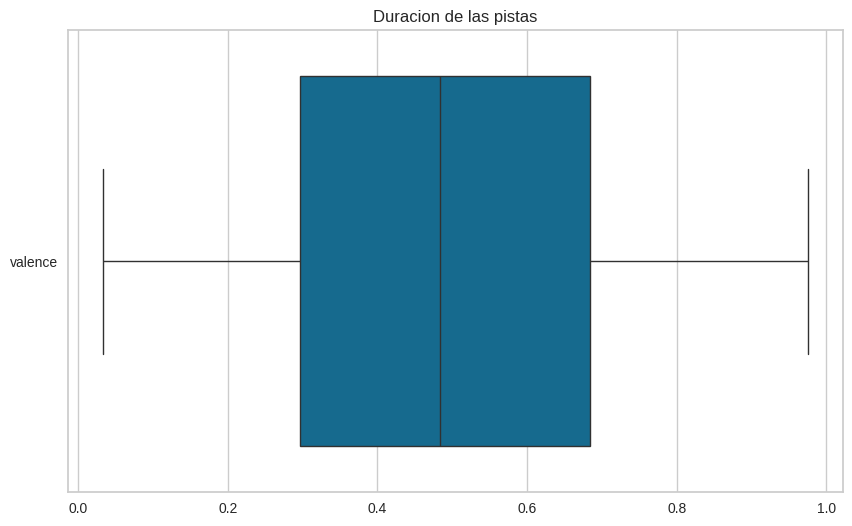

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=spotify[['valence']], orient="h")
plt.title('Duracion de las pistas')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


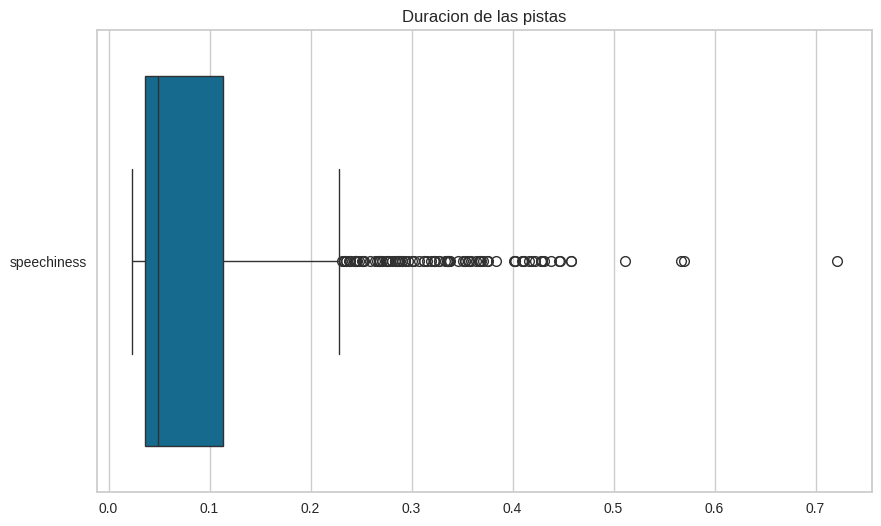

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=spotify[['speechiness']], orient="h")
plt.title('Duracion de las pistas')
plt.show()

In [ ]:
Q1 = spotify['speechiness'].quantile(0.25)
Q3 = spotify['speechiness'].quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR
spotify_filtered = spotify[(spotify['speechiness'] >= min) & (spotify['speechiness'] <= max)]

print("Cantidad de filas en el data set: ", spotify.shape[0])
print("Cantidad de filas outliers: ", spotify.shape[0]-spotify_filtered.shape[0])
print("Porcentaje de outliers: ", (100-(spotify_filtered.shape[0]/spotify.shape[0]) *100), "%")
print("Valor min: ",min)
print("Valor max: ",max)

Cantidad de filas en el data set:  750
Cantidad de filas outliers:  96
Porcentaje de outliers:  12.799999999999997 %
Valor min:  -0.07975
Valor max:  0.22865000000000002


In [ ]:
spotify['speechiness'].describe()

count    750.000000
mean       0.098966
std        0.104715
min        0.023400
25%        0.035900
50%        0.048750
75%        0.113000
max        0.721000
Name: speechiness, dtype: float64

El valor máximo de esta característica es 0.22, lo que indica que predominan las canciones musicales en el conjunto. Las pistas habladas son excepcionales, ya que se observan solo en algunas situaciones aisladas. Esto se refleja en el tercer cuartil Q3, donde los valores están por debajo de 0.11, lo que sugiere la presencia de numerosos outliers.

In [ ]:
spotify = spotify[(spotify['speechiness'] >= min) & (spotify['speechiness'] <= max)]

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


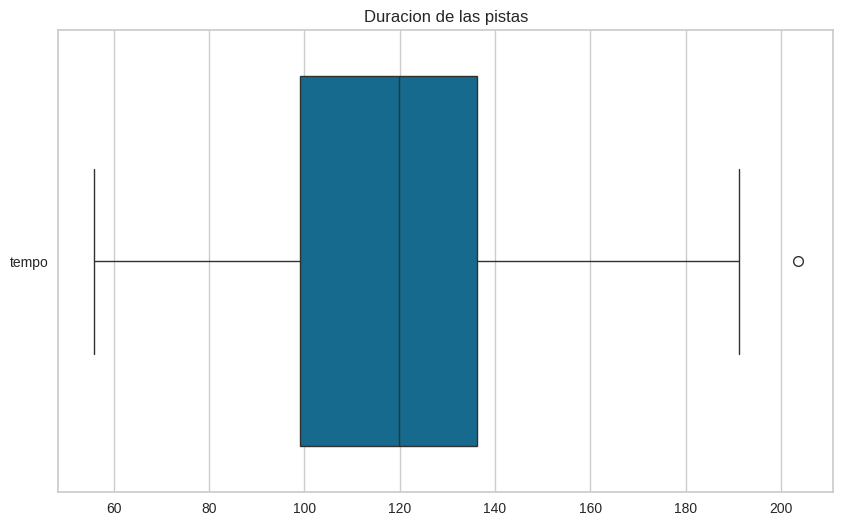

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=spotify[['tempo']], orient="h")
plt.title('Duracion de las pistas')
plt.show()

In [ ]:
min = spotify["duration"].min()
max = spotify["duration"].max()

spotify["duration"] = (spotify["duration"] - min) / (
    max - min
)

<ipython-input-72-e9e64a63fb3d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify["duration"] = (spotify["duration"] - min) / (



# Selección de K

Para empezar vamos a eliminar los outliers de duration, los consideraremos que forman para de un cluster de canciones de alta duracin

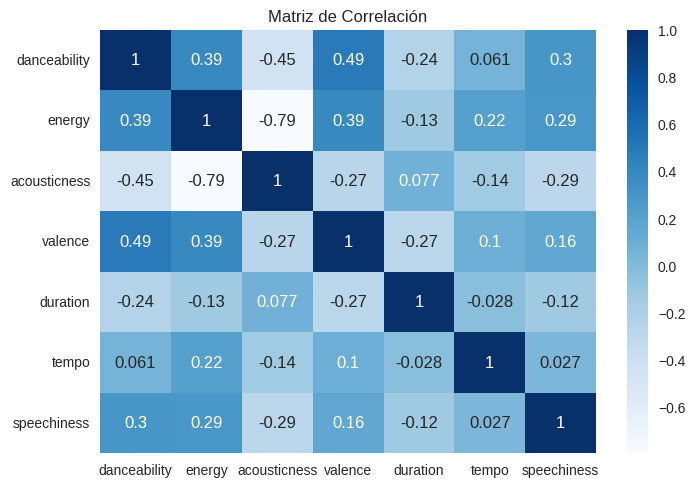

In [ ]:
correlation_matrix = spotify[['danceability', 'energy', 'acousticness', 'valence','duration','tempo','speechiness']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="Blues")
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
spotify[['danceability', 'energy', 'acousticness', 'valence','duration','tempo','speechiness']].corr()

danceability    energy  acousticness   valence  duration  \
danceability      1.000000  0.391920     -0.447087  0.489889 -0.238554   
energy            0.391920  1.000000     -0.794632  0.389163 -0.127245   
acousticness     -0.447087 -0.794632      1.000000 -0.267124  0.076708   
valence           0.489889  0.389163     -0.267124  1.000000 -0.272856   
duration         -0.238554 -0.127245      0.076708 -0.272856  1.000000   
tempo             0.060543  0.219819     -0.142094  0.101532 -0.027789   
speechiness       0.295045  0.289721     -0.286658  0.157928 -0.121697   

                 tempo  speechiness  
danceability  0.060543     0.295045  
energy        0.219819     0.289721  
acousticness -0.142094    -0.286658  
valence       0.101532     0.157928  
duration     -0.027789    -0.121697  
tempo         1.000000     0.027117  
speechiness   0.027117     1.000000

In [ ]:
Q1 = spotify['duration'].quantile(0.25)
Q3 = spotify['duration'].quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR
spotify_f = spotify[(spotify['duration'] >= min) & (spotify['duration'] <= max)]

In [ ]:
random_state = 100

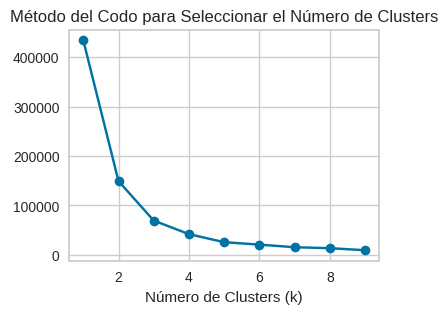

In [ ]:
spotify_f = spotify_f[['danceability', 'energy', 'acousticness', 'valence','duration','tempo','speechiness']]
sse = []
k_range = range(1, 10)


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(spotify_f)
    sse.append(kmeans.inertia_)


plt.figure(figsize=(4,3))
plt.plot(k_range, sse, marker='o')
plt.title('Método del Codo para Seleccionar el Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.show()

##Silhouette

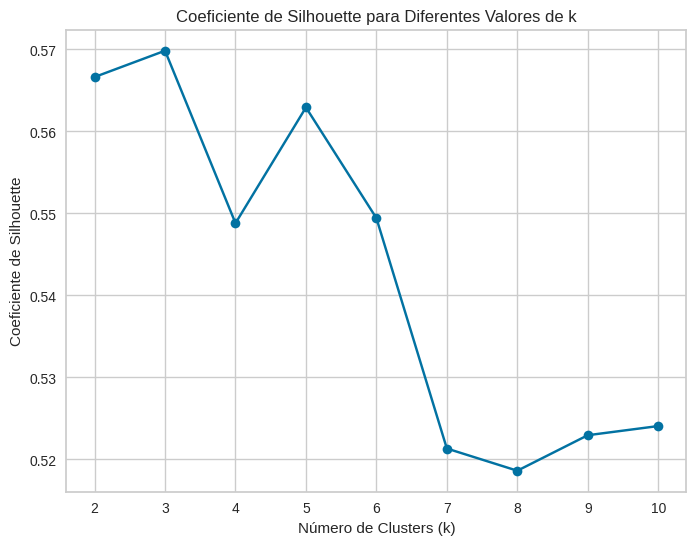

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    labels = kmeans.fit_predict(spotify_f)
    silhouette_scores.append(silhouette_score(spotify_f, labels))


plt.figure(figsize=(8,6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Coeficiente de Silhouette para Diferentes Valores de k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

list_k = list(range(2, 11))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(spotify_f)

    score = silhouette_score (spotify_f, preds)
    print ("Para n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

Para n_clusters =2 silhouette score is 0.5666310801751221
Para n_clusters =3 silhouette score is 0.5698397477559802
Para n_clusters =4 silhouette score is 0.5384319929741866
Para n_clusters =5 silhouette score is 0.5629238437106173
Para n_clusters =6 silhouette score is 0.5494234515929912
Para n_clusters =7 silhouette score is 0.5282223726381419
Para n_clusters =8 silhouette score is 0.5192526842984213
Para n_clusters =9 silhouette score is 0.5325211245308354
Para n_clusters =10 silhouette score is 0.5153177874970083


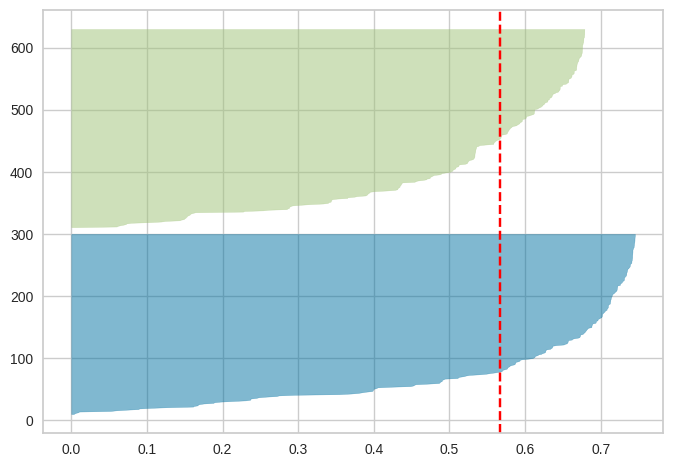

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(2, random_state=random_state)

visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(spotify_f)
plt.show()

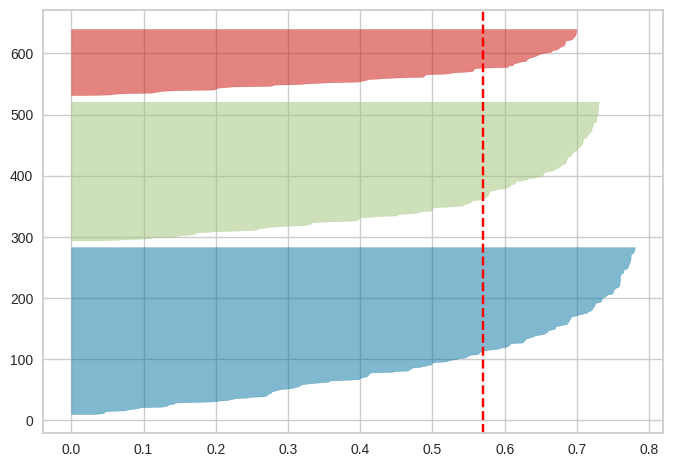

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(3, random_state=random_state)

visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(spotify_f)
plt.show()

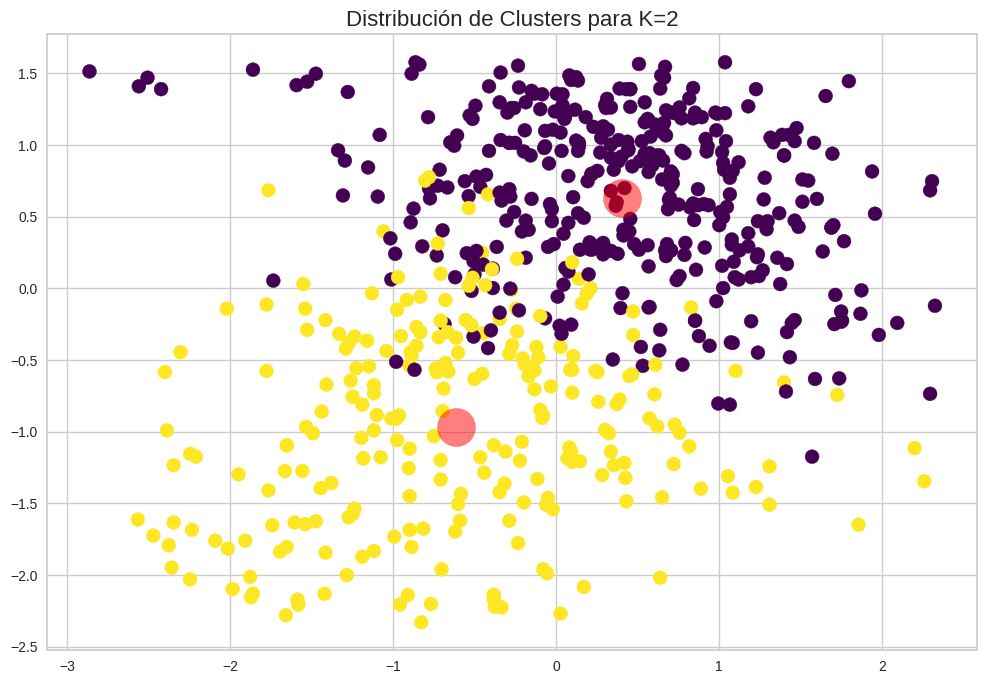

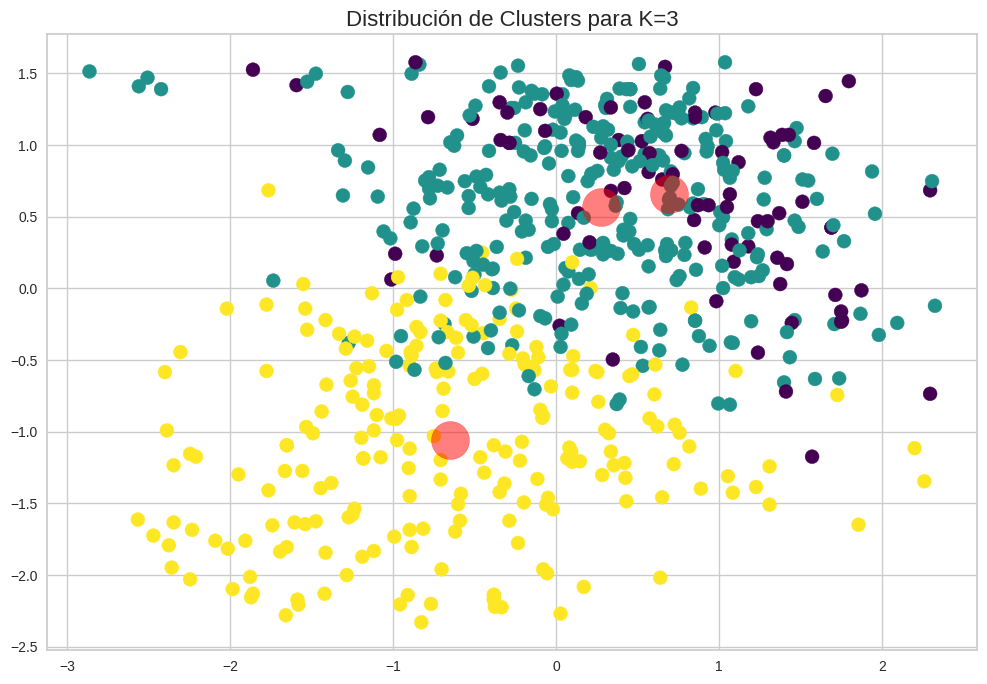

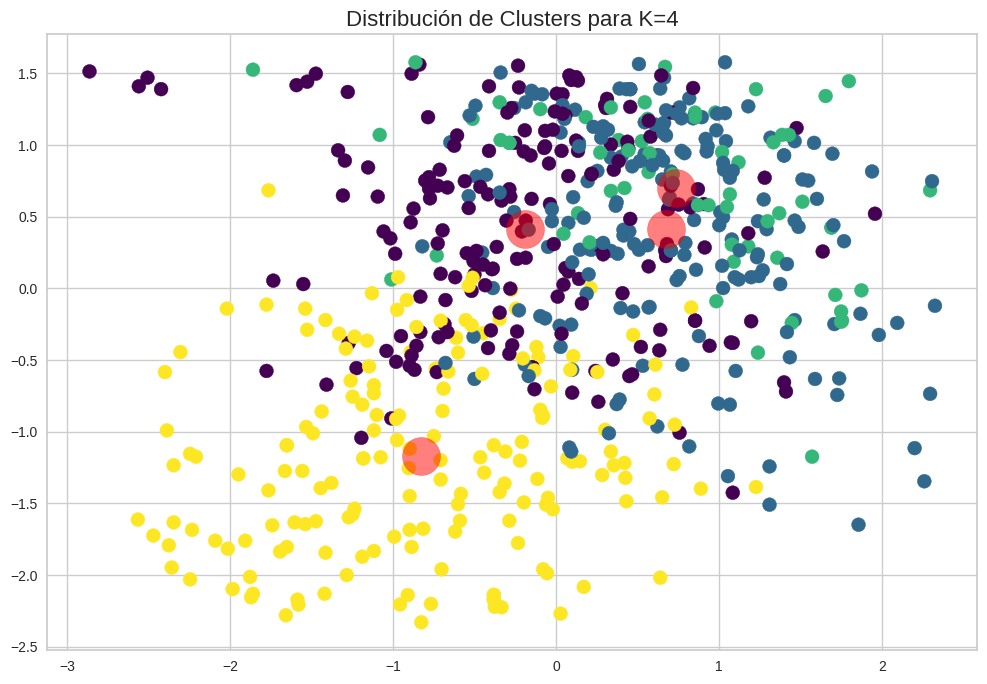

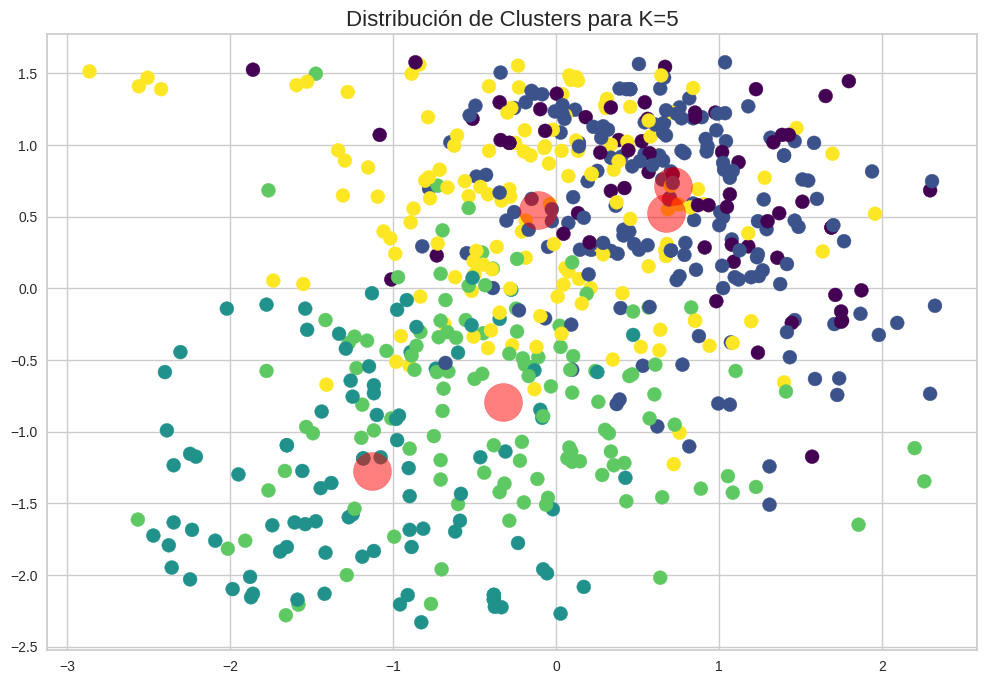

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_data = scaler.fit_transform(spotify_f)

# Bucle para diferentes valores de K
for i in range(2, 6):  # K desde 2 hasta 5
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10000, max_iter=50000)
    kmeans.fit(scaled_data)
    y_kmeans = kmeans.predict(scaled_data)


    plt.figure(figsize=(12, 8))


    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=y_kmeans, s=100, cmap='viridis')


    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=3000, alpha=0.5, marker='.')


    plt.title(f"Distribución de Clusters para K={i}", fontsize=16)


    plt.show()


El gráfico muestra claramente dos grupos de puntos distintos, lo cual indica que el algoritmo K-Means ha logrado identificar dos clusters principales.

Los dos clusters están bastante bien separados, lo que sugiere que la elección de n_clusters=2 es la mas adecuada 💪

Los centroides (representados por los puntos rojos grandes) se encuentran en el centro de cada cluster, lo cual es lo esperado y confirma que están representando bien a los datos de cada grupo.

Los clusters representan grupos de canciones que son similares entre sí de acuerdo a las características. Por ejemplo, un grupo puede tener canciones con mayor energía y menor acústica, mientras que el otro grupo puede ser más acústico y menos enérgico.

# Interpretacion

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10000, max_iter=50000)
kmeans.fit(scaled_data)
y_kmeans = kmeans.predict(scaled_data)


spotify_f['cluster'] = y_kmeans

In [ ]:
cluster_summary = spotify_f.groupby('cluster').mean()
cluster_summary

danceability    energy  acousticness   valence  duration       tempo  \
cluster                                                                         
0            0.657049  0.758081      0.141035  0.582981  0.265095  122.627238   
1            0.486112  0.357507      0.694011  0.373510  0.273128  113.781727   

         speechiness  
cluster               
0           0.077566  
1           0.043940

### El análisis de los dos clusters revela características distintivas que definen su esencia musical. En el Cluster 0, encontramos una colección de canciones que invitan al baile y a la energía. Con una bailabilidad notablemente alta (0.657). La energía de 0.758, indica ritmos dinámicos y potentes

### Por otro lado, el Cluster 1 presenta un contraste notable. Las canciones en este grupo tienen una bailabilidad más baja (0.486), con una energía mucho más suave (0.357), estas melodías transmiten una sensación de calma y reflexión

### En resumen, el Cluster 0 representa una explosión de energía y vitalidad, caracterizado por ritmos y producciones muy acusticas. En contraste, el Cluster 1 ofrece un refugio musical de calma y autenticidad, donde los sonidos acústicos y las melodías introspectivas.






